## მატრიცა

## მატრიცის დეტერმინანტი

მატრიცის დეტერმინანტი მატრიცის ძალიან მნიშვნელოვანი მახასიათებელია, ეს არის სკალარული მნიშვნელობა, რომელიც შეგვიძლია დავითვალოთ კვადრატული მატრიცის წევრების გამოყენებით, 2x2 მატრიცისთვის:

$$
A = \begin{bmatrix} a & b \\ c & d \end{bmatrix}
$$

$$
\det(A) = |A| = \begin{vmatrix} a & b \\ c & d \end{vmatrix} = ad - bc
$$


3x3ზე მატრიცისთვის დაგვჭირდება მისი დაყოფა პატარა 2x2 მატრიცებად:

$$
\det B = |B| = +a \cdot \begin{vmatrix} e & f \\ h & i \end{vmatrix} - b \cdot \begin{vmatrix} d & f \\ g & i \end{vmatrix} + c \cdot \begin{vmatrix} d & e \\ g & h \end{vmatrix}
$$

$$
= +a(ei - fh) - b(di - fg) + c(dh - eg)
$$

$$
= aei - afh - bdi + bfg + cdh - ceg
$$

$$
= aei + bfg + cdh - ceg - afh - bdi
$$


დეტერმინანტი გვიჩენებს მატრიცის რამდენიმე მნიშვნელოვან მახასიათებელს:



⭐ **თეორემა.** კვადრატული მატრიცა A შექცევადია მაშინ და მხოლოდ მაშინ, როცა det A ≠ 0.

⭐ det(A) = det(A^T)

⭐ det(AB) = det(A) det(B)


**შედეგი:**
det(A) det(A^-1) = det(AA^-1)
                 = det(I) = 1
                 ⇒ det(A^-1) = 1/det A

⭐ თუ A შექცევადია, მაშინ det(A^-1) = 1/det A.

განმარტებები

- A: კვადრატული მატრიცა
- det: დეტერმინანტი
- A^T: A მატრიცის ტრანსპონირებული
- A^-1: A მატრიცის შებრუნებული
- I: ერთეულოვანი მატრიცა


<img src="https://i.makeagif.com/media/8-19-2022/Uz6Cin.gif" width=600 style="display: block; margin: 0 auto">

### მატრიცის ფაქტორიზაცია

როგორც წინა ლექციაში ვნახეთ, მატრიცაზე თითქმის ყველა იმ ოპერაციის განხორციელება შეგვიძლია, რასაც რიცხვებზე ვაკეთებთ ხოლმე. ერთ-ერთი მნიშვნელოვანი გზა მატრიცებთან დაკავშირებული ამოცანების გადასაჭრელად არის მატრიცების ფაქტორიზაცია, როგორც რიცხვების შემთხვევაში, მატრიცების ფაქტორიზაციაც გულისხმობს მატრიცის დაშლად რამდენიმე მატრიცის ნამრავლად.

. ერთ-ერთი ცნობილი ფაქტორიზაციაა LU ფაქტორიზაცია:

- $LU = A$
- $L$ არის ქვედა სამკუთხა მატრიცა, რომელსაც დიაგონალები 1-იანებით აქვს შევსებული
- $U$ არის ზედა დიაგონალური მატრიცა

აი რის განხორციელებას ვცდილობთ ვიზუალურად:


$$
\begin{equation}
A = \left[ \begin{array}{cccc} * & * & * & * \\ * & * & * & * \\ * & * & * & * \\ * & * & * & *  \end{array}\right]\hspace{1cm}
L = \left[ \begin{array}{cccc} 1 & 0 & 0 & 0 \\ * & 1 & 0 & 0 \\ * & * & 1 & 0 \\ * & * & * & 1 \end{array}\right]\hspace{1cm}
U = \left[ \begin{array}{cccc} * & * & * & * \\ 0 & * & * & * \\ 0 & 0 & * & * \\ 0 & 0 & 0 & *  \end{array}\right]\hspace{1cm}
\end{equation}
$$

მოდი, დავფიქრდეთ, რაში შეიძლება გამოგვადგეს მსგავსი ფაქტორიზაცია? წარმოვიდგინოთ, რომ ჩვენ ვიპოვეთ ისეთი L და U, რომ A=LU და ახლა გვინდა ამოვხსნათ სისტემა AX=B. ამ პრობლემის მეორენაირი ჩანაწერი იქნებოდა LUX=B. შემდეგ ჩვენ შეგვიძლია შემოვიღოთ ახალი უცნობი Y, და გამოვსახოთ როგორც UX =Y. ახლა ერთი AX=B განტოლების ნაცვლად ორი განტოლება გვექნება:

$$
\begin{eqnarray*}
UX & = & Y\\
LY & = & B
\end{eqnarray*}
$$

მართალია, განტოლებების რაოდენობა გავაორმაგეთ, მაგრამ ეს განტოლებები უკვე მარტივად ამოიხსნება.


## სისტემის ამოხსნა:



$$
\left[ \begin{array}{ccc} 3 & -1 & -2 \\ 6 & -1 & 0  \\ -3 & 5 & 20  \end{array}\right]X =
\left[ \begin{array}{c} -4 \\ -8 \\ 6  \end{array}\right]\hspace{1cm}
$$


სადაც X უცნობი 3x1 ზე ვექტორია. ჩავთვალოთ რომ გამოვითვალეთ L და U:

$$
L = \left[ \begin{array}{ccc} 1 & 0 & 0 \\ 2 & 1 & 0  \\ -1 & 4 & 1  \end{array}\right] \hspace{2cm}
U = \left[ \begin{array}{ccc} 3 & -1 & -2 \\ 0 & 1 & 4  \\ 0 & 0 & 2  \end{array}\right]
$$


ახლა მოდი დავწეროთ სისტემა $UX=Y$ and $LY = B$ :


$$
\begin{eqnarray*}
x_1 \hspace{2.1cm}& = & y_1\\
2x_1 + x_2 \hspace{1.1cm}& = & y_2\\
-x_1 + 4x_2 +x_3 & = & y_3 \\
\\
3y_1 - y_2 - 2y_3 & = & -4\\
y_2 + 4y_3 & = & -8\\
2y_3 & = & 6
\end{eqnarray*}
$$

ბოლო განტოლებით გამოვითვლით y3-ს, რითიც გამოვითვლით y2-ს და y1-ს, შემდეგ კი ანალოგიური პრინციპით x-ს.


$$
A = L \cdot U
$$



$$
A = \begin{bmatrix}
x & x & x \\
x & x & x \\
x & x & x \\
x & x & x \\
x & x & x \\
\end{bmatrix}, \quad
L = \begin{bmatrix}
1 & 0 & 0 \\
x & 1 & 0 \\
x & x & 1 \\
x & x & x \\
x & x & x \\
\end{bmatrix}, \quad
U = \begin{bmatrix}
x & x & x \\
0 & x & x \\
0 & 0 & x \\
\end{bmatrix}
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def lu_decomposition(A):
    n = A.shape[0]
    L = np.eye(n, dtype=float)
    U = A.astype(float).copy()

    steps = []
    steps.append(('Initial', A.astype(float).copy(), L.copy(), U.copy()))

    for i in range(n):
        for j in range(i+1, n):
            factor = U[j, i] / U[i, i]
            L[j, i] = factor
            U[j, i:] -= factor * U[i, i:]
            steps.append(('Step', A.astype(float).copy(), L.copy(), U.copy()))

    steps.append(('Final', A.astype(float), L, U))
    return steps

def create_lu_animation(A):
    steps = lu_decomposition(A)

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    plt.close()  # Prevent display of static plot

    titles = ['A', 'L', 'U']
    vmax = np.abs(A).max()
    images = [ax.imshow(np.zeros_like(A, dtype=float), cmap='coolwarm', vmin=-vmax, vmax=vmax) for ax in axs]

    for ax, title in zip(axs, titles):
        ax.set_title(title)
        ax.axis('off')

    text = fig.text(0.5, 0.04, '', ha='center', va='center', fontsize=12)

    def update(frame):
        step_type, A_step, L_step, U_step = steps[frame]
        matrices = [A_step, L_step, U_step]

        for img, matrix in zip(images, matrices):
            img.set_array(matrix)

        if step_type == 'Initial':
            text.set_text('Initial matrices')
        elif step_type == 'Final':
            text.set_text('Final decomposition: A = LU')
        else:
            text.set_text(f'Step {frame}: Eliminating below diagonal in column {frame}')

        return images + [text]

    anim = FuncAnimation(fig, update, frames=len(steps), interval=1000, blit=True)
    return HTML(anim.to_jshtml())

# Example usage
A = np.array([[2, 1, 1],
              [4, 3, 3],
              [8, 7, 9]])

print("Original matrix A:")
print(A)
print("\nGenerating LU decomposition animation...")
animation = create_lu_animation(A)
display(animation)

print("\nNote: The animation should appear above this text. If it doesn't, make sure you're running this in a Jupyter notebook environment.")

Original matrix A:
[[2 1 1]
 [4 3 3]
 [8 7 9]]

Generating LU decomposition animation...



Note: The animation should appear above this text. If it doesn't, make sure you're running this in a Jupyter notebook environment.


https://developers.google.com/machine-learning/recommendation/collaborative/basics

https://developers.google.com/machine-learning/recommendation/collaborative/matrix

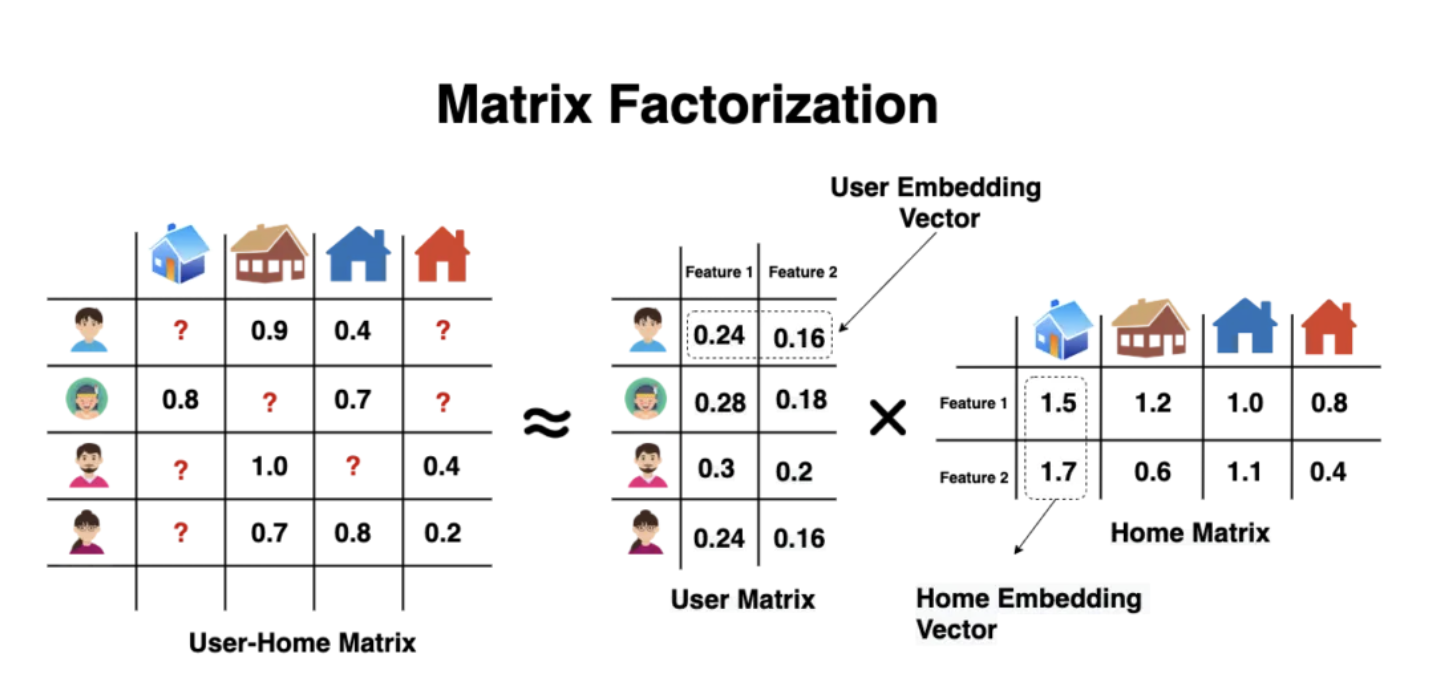

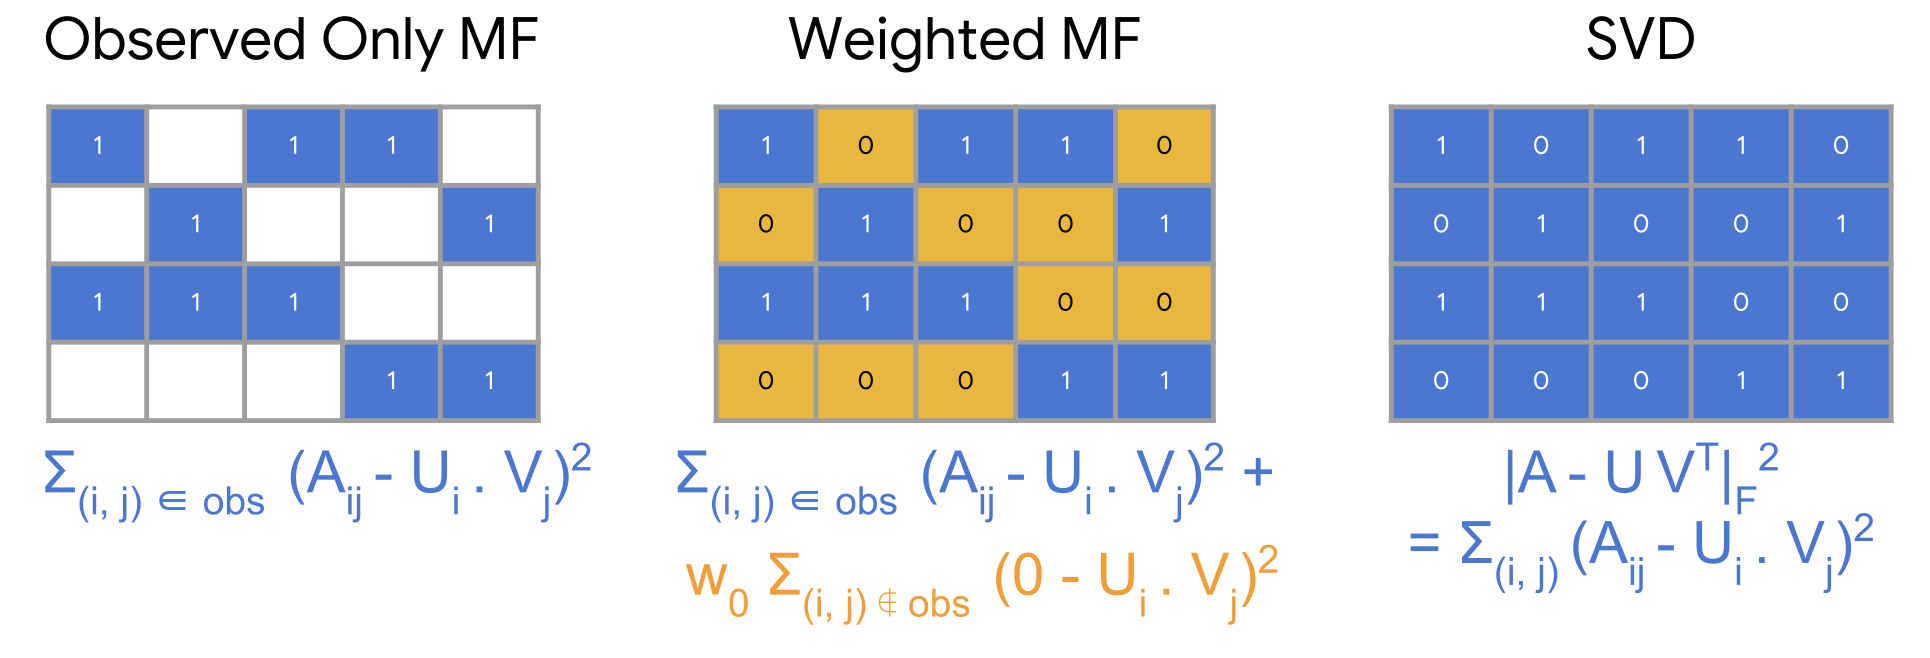